In [1]:
# !pip install selenium
import re
import pandas as pd
from selenium import webdriver
chrome_path = r'C:/Users/garga/Downloads/chromedriver_win32/chromedriver'

In [2]:
driver = webdriver.Chrome(chrome_path)  # This will open up a chrome window
output = "C://Users//garga//Desktop//Text Analytics//Assignment2//Data"

### Problem 1

In [3]:
def scraper(url,xpath,csv_name):
    
    cmt = []
    for i in range (530,703):
        driver.get(url.format(i))
        driver.find_element_by_xpath(xpath)
        comments = driver.find_elements_by_class_name('Comment')
        for comment in comments:
            cmt.append(comment.text)
        print (i)
        
    user_ID = pd.Series(cmt).apply(lambda x: re.findall('(\w+)\s',x)[0])
    date = pd.Series(cmt).apply(lambda x: re.findall('.*\n(.*)\n?',x)[0])
    comment = pd.Series(cmt).apply(lambda x: ' '.join(re.findall('.*\n.*\n(.*)',x)))
    
    global edmunds_forum
    edmunds_forum = pd.concat([user_ID, date, comment], axis=1)
    edmunds_forum.columns = ['user_ID', 'date', 'message']
    edmunds_forum.to_csv(r'{}//{}.csv'.format(output,csv_name))


### Problem 2

In [4]:
url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p{}"
xpath = """//*[@id="Content"]/div[4]/div[1]/ul"""
csv_name = "problem1b"

scraper(url,xpath,csv_name)

530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702


### Problem 3

In [6]:
import numpy as np
model_brand = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Assignment2\Data\models.csv',encoding = 'cp1252')
brand_dict = dict(zip(model_brand.iloc[:,1], model_brand.iloc[:,0]))
discussions = edmunds_forum['message']
def repl(text):
    words = text.split()
    final_string = ' '.join(str(brand_dict.get(word, word)) for word in words)
    return final_string
    
replaced_brands = pd.DataFrame(discussions.map(repl))

#count the brands
brands = model_brand.iloc[:,0].unique()
brands_r = pd.Series(brands).replace(['hyundai,','hyundai.','kia,','kia.','nissan.','toyata','volkwagen']
                                     ,['hyundai','hyundai','kia','kia','nissan','toyota','volkswagen']).unique()

for i,brand in enumerate (brands_r):
    find_brand = replaced_brands['message'].apply(lambda x: len(re.findall(brand,x.lower()))>0)
    replaced_brands.insert(loc=i, column=brand, value = find_brand)

brand_frequecy = replaced_brands.sum().apply(lambda x: np.where(type(x)==int,x,'0'))
brand_frequecy.astype(int).sort_values(ascending= False)[1:11]

bmw         1196
audi         845
acura        573
sedan        278
seat         269
honda        269
infiniti     265
problem      221
cadillac     210
kia          189
dtype: int32

### Lift Values

In [7]:
replaced_brands = replaced_brands.loc[:, replaced_brands.columns != 'message']
replaced_brands = replaced_brands.loc[:, replaced_brands.columns != 'car']

In [22]:
n = len(replaced_brands)
def lift_bw_brands(brand1, brand2):
    a = sum(replaced_brands[brand1])
    b = sum(replaced_brands[brand2])
    c = sum(replaced_brands[brand1]&replaced_brands[brand2])
    
    P_a = np.where(type(a)==int,a,0)/n
    P_b = np.where(type(b)==int,b,0)/n
    P_ab = np.where(type(c)==int,c,0)/n    

    if P_a*P_b != 0:
        lift = P_ab/P_a/P_b
    else:
        lift = np.nan
    return lift

columns = ['brand1','brand2', 'lift']
df_lift = pd.DataFrame(columns=columns)
i = 1
for brand1 in list(replaced_brands):
    for brand2 in list(replaced_brands):
        lift = lift_bw_brands(brand1, brand2)
        df_lift = df_lift.append({'brand1':brand1, 'brand2':brand2, 'lift': lift}, ignore_index=True)
    i+=1


In [92]:
df_lift.sort_values(by = 'lift', ascending = False)
dissimilarity = pd.crosstab(df_lift['brand1'], df_lift['brand2'], 1/df_lift['lift'], aggfunc=np.mean)
dissimilarity = dissimilarity[~dissimilarity.index.isin(['suzuki','hyndai kia'])]
dissimilarity
# df_lift['brand2']

brand2,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,nissan,pontiac,problem,saturn,seat,sedan,subaru,toyota,volkswagen,volvo
brand1,,,,,,,,,,,,,,,,,,,,,
acura,0.110875,0.487964,0.744978,0.751483,0.388061,0.709598,0.665248,1.663119,0.627015,0.236708,...,0.337904,0.665248,0.628289,0.221749,0.634580,0.497147,1.488888,0.385421,0.960913,0.461978
audi,0.487964,0.163506,0.558724,0.767221,0.333362,1.308050,0.338289,0.490519,0.687564,0.563887,...,0.523220,0.981037,0.508942,0.327012,0.478078,0.534761,0.904093,0.542543,0.425116,0.398796
bmw,0.744978,0.558724,0.231424,0.672232,0.522571,0.925697,0.816791,0.991818,0.677742,1.174587,...,0.740557,1.388545,0.672957,0.462848,0.523135,0.494892,1.359617,0.734520,0.859575,0.538196
buick,0.751483,0.767221,0.672232,0.011803,0.145807,0.377709,0.088526,0.059017,0.193576,0.793779,...,0.755418,0.023607,1.304276,inf,1.058372,0.410168,1.109520,0.287216,inf,0.147543
cadillac,0.388061,0.333362,0.522571,0.145807,0.040635,inf,0.143416,0.243808,0.370227,0.607263,...,0.650155,0.081269,0.280633,0.081269,0.728715,0.491150,1.909830,0.211881,0.528251,0.270898
chevrolet,0.709598,1.308050,0.925697,0.377709,inf,0.006192,inf,0.185759,0.507740,1.665635,...,inf,inf,0.456140,inf,0.832817,0.430341,inf,0.452012,inf,inf
chrysler,0.665248,0.338289,0.816791,0.088526,0.143416,inf,0.011610,0.034830,0.126935,0.520511,...,0.371517,0.034830,0.366541,0.023220,1.041022,1.075851,1.091331,0.169505,inf,0.232198
dodge,1.663119,0.490519,0.991818,0.059017,0.243808,0.185759,0.034830,0.005805,0.190402,0.780766,...,0.371517,inf,0.641447,inf,0.520511,0.806889,0.545666,inf,0.150929,inf
ford,0.627015,0.687564,0.677742,0.193576,0.370227,0.507740,0.126935,0.190402,0.031734,0.502140,...,0.406192,0.047601,0.584430,0.063467,0.776034,0.441099,0.372872,0.193047,0.206269,1.057792


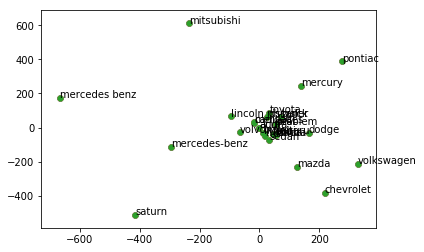

In [93]:
import sklearn.manifold
MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')

dissimilarity = dissimilarity.replace([np.inf, -np.inf], np.nan)
dissimilarity.fillna(999, inplace=True)
dissimilarity
npos = MDS_cars.fit_transform(dissimilarity)



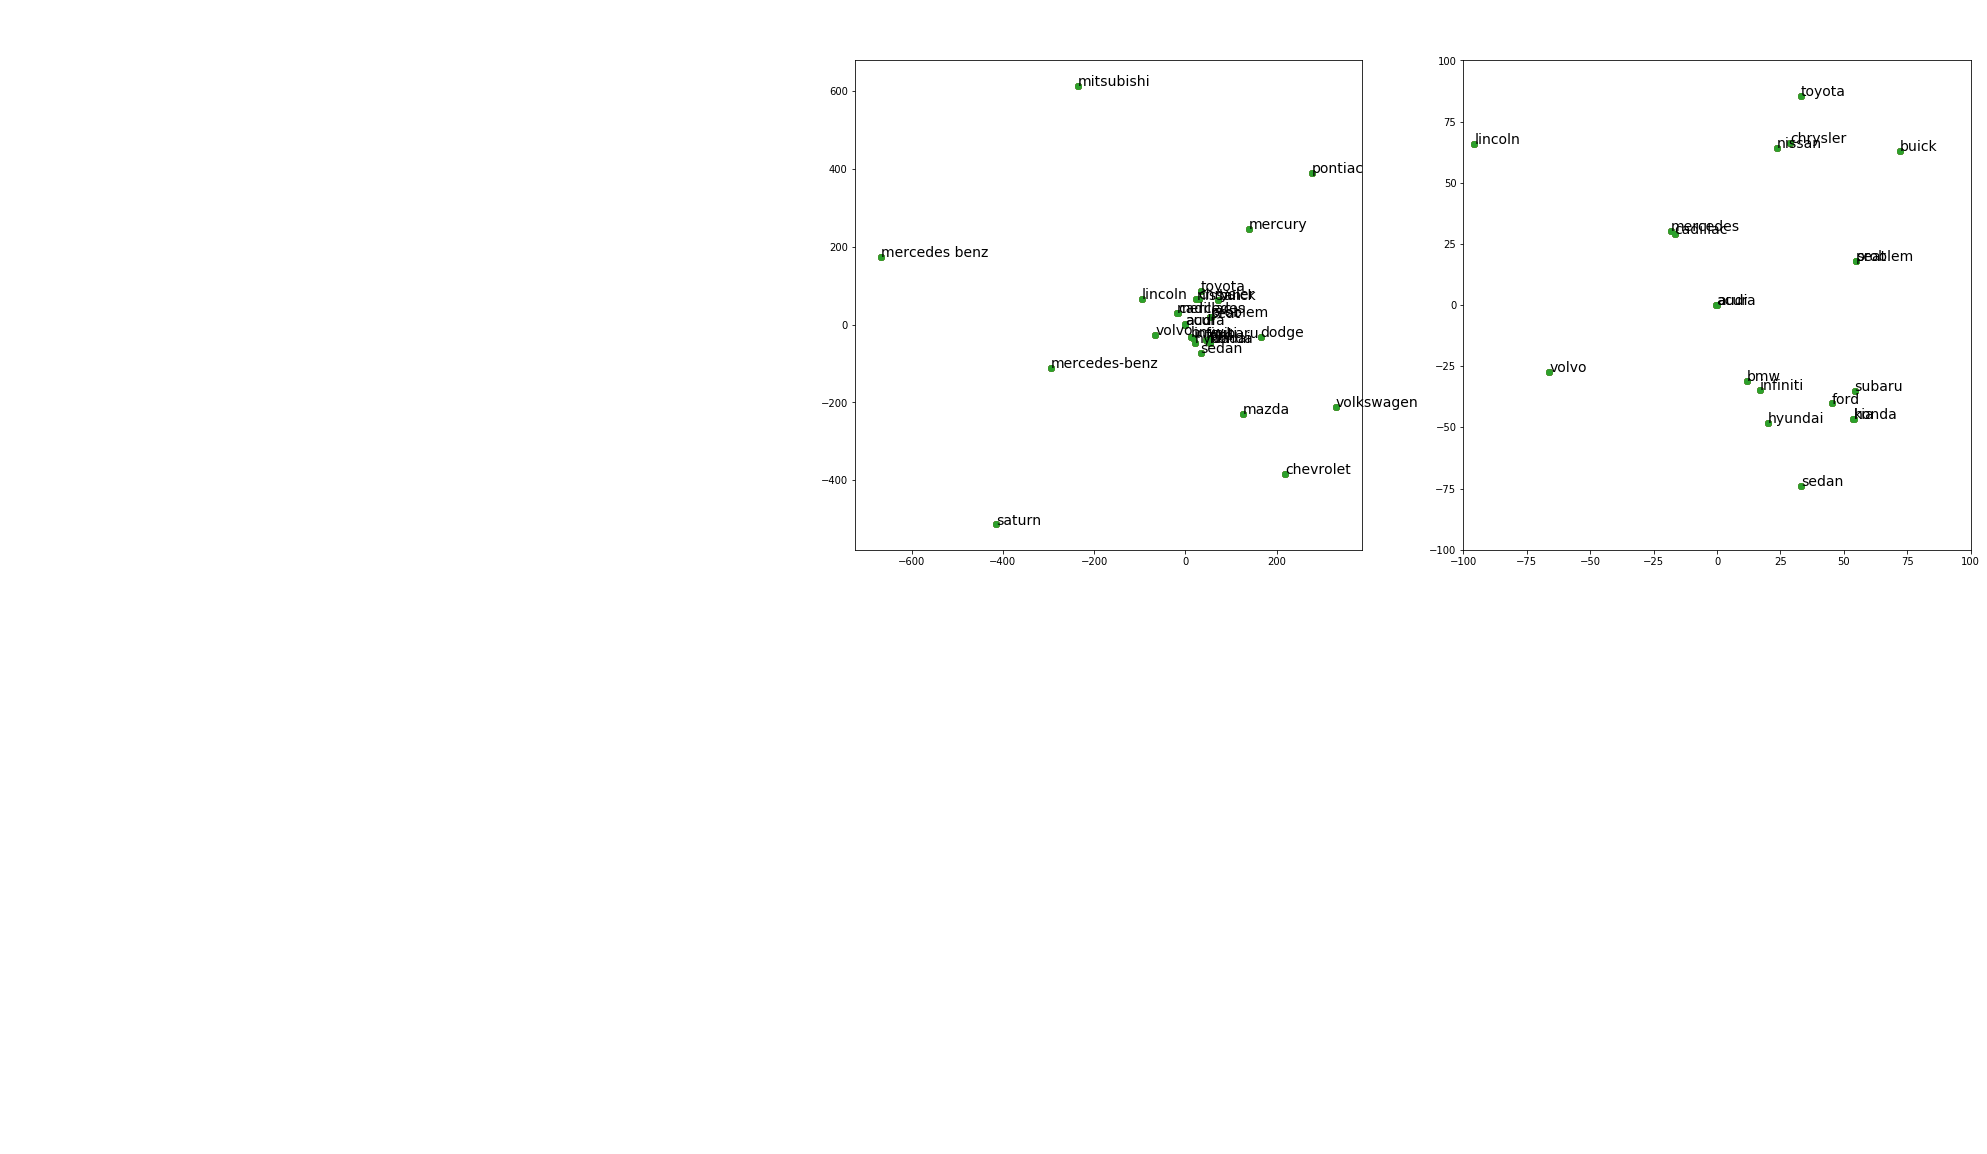

In [127]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,9))

for label in np.unique(brands_r):
        position=dissimilarity==label
        ax1.scatter(npos[:, 0], npos[:, 1])
for i, txt in enumerate(list(dissimilarity)):
    ax1.annotate(txt, (npos[i, 0], npos[i, 1]), size =14)
    
    
for label in np.unique(brands_r):
        ax2.scatter(npos[:, 0], npos[:, 1])
ax2.set_xlim(-100, 100)
ax2.set_ylim(-100, 100)

for i, txt in enumerate(list(dissimilarity)):
    ax2.annotate(txt, (npos[i, 0], npos[i, 1]), size =14)